In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import tensorflow as tf

In [3]:
tf.__version__

'2.3.1'

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os

In [5]:
# загрузка датасета
(train_x, train_y), (test_x, test_y) = tf.keras.datasets.cifar10.load_data()

In [6]:
train_x.shape

(50000, 32, 32, 3)

In [7]:
# разделение тренировочной и тестовой выборки
print('train_x shape:', train_x.shape)
print(train_x.shape[0], 'тренировочные примеры')
print(test_x.shape[0], 'тестовые примеры')

train_x shape: (50000, 32, 32, 3)
50000 тренировочные примеры
10000 тестовые примеры


In [8]:
# Создадим список классов
num_classes = 10
classes=['самолет', 'автомобиль', 'птица', 'кот', 'олень', 'собака', 'лягушка', 'лошадь', 'корабль', 'грузовик']

In [9]:
# преобразование матрицы чисел 0-9 в бинарную матрицу чисел 0-1
train_y = keras.utils.to_categorical(train_y, num_classes)
test_y = keras.utils.to_categorical(test_y, num_classes)

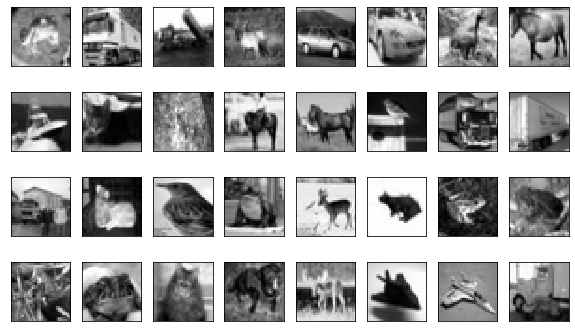

In [10]:
# Посмотрим на последние 32 картинки
some_samples = train_x[:32, ...]

fig = plt.figure(figsize=(10, 6))
for j in range(some_samples.shape[0]):
    ax = fig.add_subplot(4, 8, j+1)
    ax.imshow(some_samples[j,:,:,0], cmap='gray')
    plt.xticks([]), plt.yticks([])
plt.show()

In [11]:
train_x = train_x.astype('float32')
test_x = test_x.astype('float32')
train_x /= 255
test_x /= 255

In [12]:
# Создадим модель
model = Sequential()
# слои нейросети отвественные за свертку и max-pooling
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=train_x.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# полносвязные слои нейронной сети
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [13]:
# скомпилируем модель с параметрами оптимизации, 
model.compile(loss='categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])

In [14]:
# Зададим глобальные переменные

# Количество эпох обучения модели
NUM_EPOCHS = 10
# Размер пакета
BATCH_SIZE = 32

In [15]:
# Обучим модель

model.fit(train_x, train_y, 
              epochs=NUM_EPOCHS,
              batch_size=BATCH_SIZE,
              validation_data=(test_x, test_y),
              shuffle=True)

Epoch 1/10
1563/1563 [==============================] - 278s 178ms/step - loss: 2.1001 - accuracy: 0.2200 - val_loss: 1.9368 - val_accuracy: 0.3125
Epoch 2/10
1563/1563 [==============================] - 317s 203ms/step - loss: 1.8486 - accuracy: 0.3295 - val_loss: 1.6460 - val_accuracy: 0.4103
Epoch 3/10
1563/1563 [==============================] - 256s 164ms/step - loss: 1.6628 - accuracy: 0.3960 - val_loss: 1.5222 - val_accuracy: 0.4467
Epoch 4/10
1563/1563 [==============================] - 294s 188ms/step - loss: 1.5459 - accuracy: 0.4360 - val_loss: 1.4244 - val_accuracy: 0.4848
Epoch 5/10
1563/1563 [==============================] - 292s 187ms/step - loss: 1.4380 - accuracy: 0.4791 - val_loss: 1.2921 - val_accuracy: 0.5348
Epoch 6/10
1563/1563 [==============================] - 233s 149ms/step - loss: 1.3502 - accuracy: 0.5137 - val_loss: 1.3342 - val_accuracy: 0.5335
Epoch 7/10
1563/1563 [==============================] - 223s 143ms/step - loss: 1.2771 - accuracy: 0.5439 - val_

In [16]:
# Оценка качества модели
scores = model.evaluate(test_x, test_y, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

313/313 [==============================] - 7s 21ms/step - loss: 1.0931 - accuracy: 0.6103
Test loss: 1.0931451320648193
Test accuracy: 0.6103000044822693


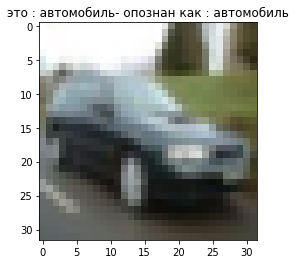

In [18]:
# Предсказание случайного изображения
import random
N = random.randint(0, test_x.shape[0])
y_p=model.predict(test_x[N:N+1][:,:,:])
y_t = np.argmax(test_y[N:N+1], axis = 1 )
y_i = np.argmax(y_p, axis = 1 )
plt.imshow(test_x[N][:,:,:])
plt.title('это : '+classes[y_t[0]]+'- опознан как : '+classes[y_i[0]])
plt.show()

Точность модели не высокая. Можно увеличить количество эпох и дообучить модель

In [20]:
filename = 'keras_cifar10.h5'

In [21]:
# Сохраним модель в текущую директорию
model.save(filename)
print(f'сохранили обученную модель как {filename}')

сохранили обученную модель как keras_cifar10.h5
